<h1>DSS 740: Analytics with Machine Learning (Fall 2025)</h1>
<h2 style = 'color:yellow'>OH 2.2: Data Pre-Processing and Feature Engineering</h2>
<h3 style = 'color:green'>2.2.1 Import Libraries</h3>

In [1]:
# Basic Python Libraries used to manipulate data
import numpy as np
import pandas as pd

# Visualization libraries and understanding missing data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Scikit-learn libraries for data preprocessing
  # MinMax transforms features by scaling each feature to a given range, such as 0 to 1, whereas StandardScaler standardizes features by removing the mean and scaling to unit variance.
  # SimpleImputer is used to fill missing values with a specified strategy (mean, median, most_frequent, constant)
  # LabelEncoder is used to transform categorical variables into numerical format
  # OneHotEncoder is used to transform categorical variables into dummy/indicator variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

<h3 style = 'color:green'>2.2.2 Load and Explore Data</h3>

In [2]:
df = pd.read_csv("../data/synthetic_housing_data (Classification).csv")
df.head()


,income,credit_score,house_size,location,property_type,listing_date,realtor_rating,flood_risk,crime_rate,purchase_decision
0,79934.283060,426.0,2148,suburb,Multi-Family,18.4.2023,2.674429,Low,36.504238,not buy
1,67234.713977,313.0,2144,suburb,Townhouse,2019-03-14,2.833726,High,45.847862,buy
2,82953.770762,311.0,1845,downtown,Townhouse,7/26/2019,3.900024,High,50.340274,not buy
3,100460.597128,386.0,1102,rural,Multi-Family,12/28/2020,3.297150,Medium,51.113726,buy
4,65316.932506,823.0,1274,rural,Multi-Family,10.1.2019,3.668849,High,48.209067,buy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             990 non-null    float64
 1   credit_score       995 non-null    float64
 2   house_size         1000 non-null   int64  
 3   location           1000 non-null   object 
 4   property_type      1000 non-null   object 
 5   listing_date       1000 non-null   object 
 6   realtor_rating     995 non-null    float64
 7   flood_risk         999 non-null    object 
 8   crime_rate         1000 non-null   float64
 9   purchase_decision  1000 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,990.0,73109.461901,33564.189209,5174.653199,57304.357801,70920.083881,83568.063695,459931.000000
credit_score,995.0,581.898492,160.549048,300.000000,447.500000,582.000000,718.000000,1140.000000
house_size,1000.0,2013.919000,517.099598,-97.000000,1682.000000,2034.000000,2368.000000,3747.000000
realtor_rating,995.0,3.013208,1.450503,1.000123,1.961661,2.944522,3.920942,19.032236
crime_rate,1000.0,49.863643,14.918971,-6.799839,42.749880,49.655336,55.913725,244.818018


In [5]:
df.describe(include='object').T

,count,unique,top,freq
location,1000,15,uptown,207
property_type,1000,7,Townhouse,273
listing_date,1000,916,not_a_date,5
flood_risk,999,5,High,357
purchase_decision,1000,2,buy,624


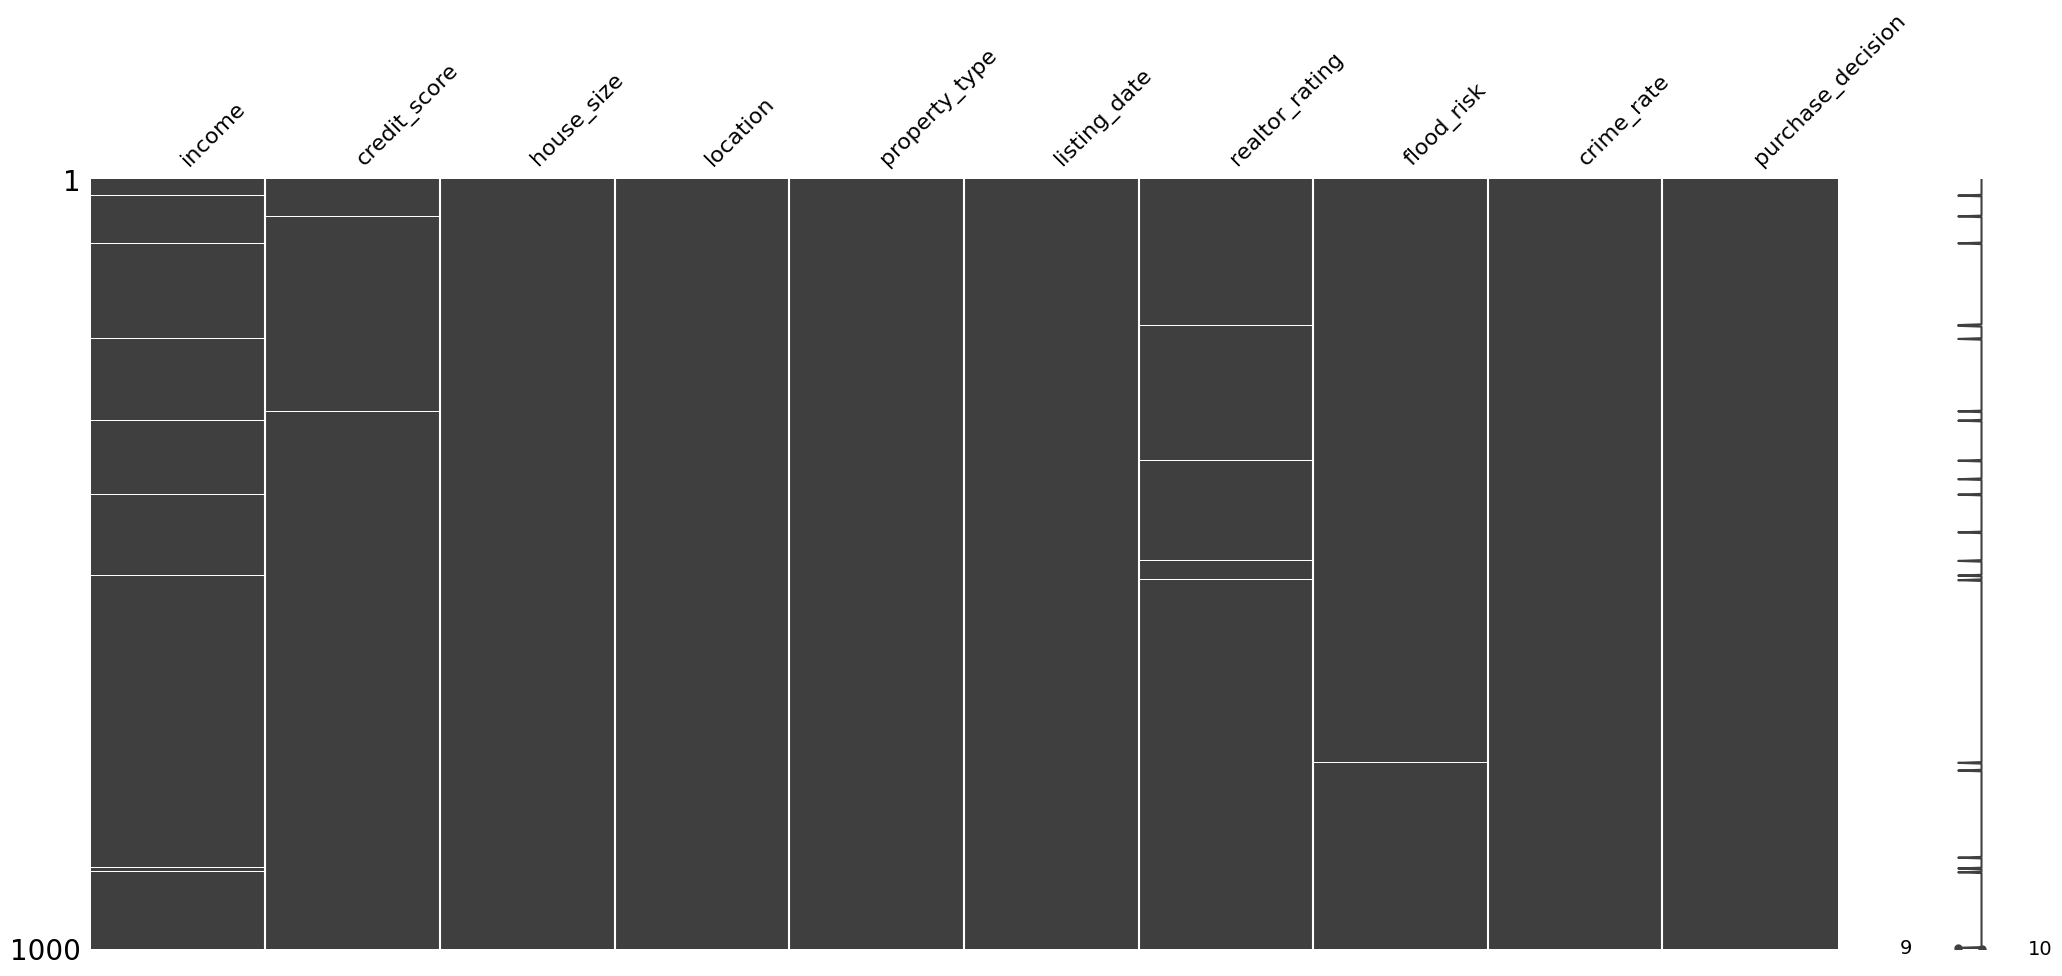

In [6]:
# Explore MissingNo
msno.matrix(df)
plt.show()

<h3 style = 'color:green'>2.2.3 Univariate Analysis</h3>

For inspiration, visit <a href = "https://seaborn.pydata.org/tutorial/categorical.html">Seaborn Tutorial</a>

In [7]:
df.columns

Index(['income', 'credit_score', 'house_size', 'location', 'property_type',
       'listing_date', 'realtor_rating', 'flood_risk', 'crime_rate',
       'purchase_decision'],
      dtype='object')

In [8]:
def make_plots_pretty(myPlot, title, xlabel, ylabel, figsize=(10,6)):
    try:
        myPlot.set_title(title, fontsize=16)
        myPlot.set_xlabel(xlabel, fontsize=14)
        myPlot.set_ylabel(ylabel, fontsize=14)
    except Exception as e:
        print(f"Error occurred while making plots pretty: {e}")
    plt.tight_layout()
    plt.show()

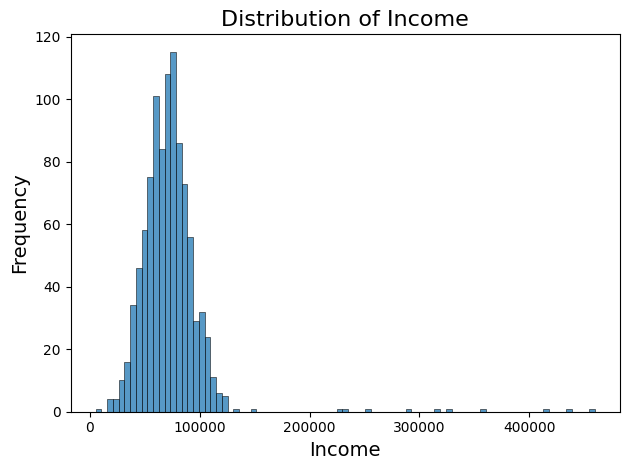

In [9]:
myPlot = sns.histplot(df['income'])
make_plots_pretty(myPlot, 'Distribution of Income', 'Income', 'Frequency')

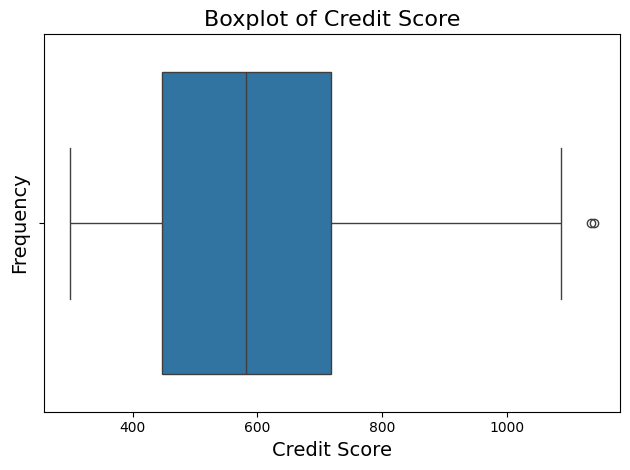

In [10]:
myPlot = sns.boxplot(x=df['credit_score'])
make_plots_pretty(myPlot, 'Boxplot of Credit Score', 'Credit Score', 'Frequency')

Error occurred while making plots pretty: 'FacetGrid' object has no attribute 'set_title'


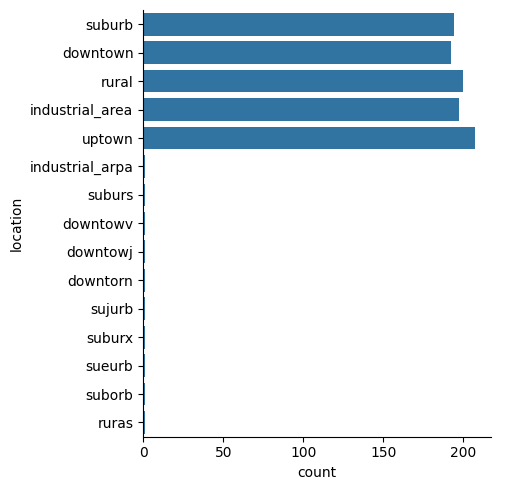

In [11]:
myPlot = sns.catplot(data = df, y="location", kind = 'count')
make_plots_pretty(myPlot, 'Count of Locations', 'Location', 'Count')

C:\Users\Owner\AppData\Local\Temp\ipykernel_41436\3275038127.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].replace(replacement_map, inplace=True)


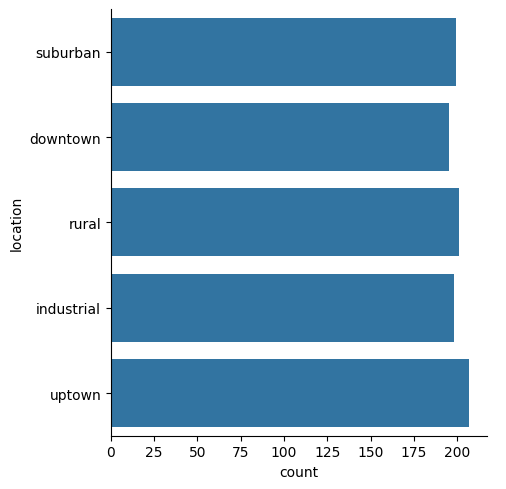

In [12]:
# Fix spellings of location
replacement_map = {
    'industrial_area': 'industrial',
    'industrial_arpa': 'industrial',
    'suburb': 'suburban',
    'sujurb': 'suburban',
    'suburx': 'suburban',
    'sueurb': 'suburban',
    'suborb': 'suburban',
    'suburbs': 'suburban',
    'suburs': 'suburban',
    'ruras': 'rural',
    'downtowv': 'downtown',
    'downtowj': 'downtown',
    'downtorn': 'downtown'
}
df['location'].replace(replacement_map, inplace=True)
sns.catplot(data = df, y="location", kind = 'count')

<h3 style = 'color:green'>2.2.4 Bivariate Analysis</h3>

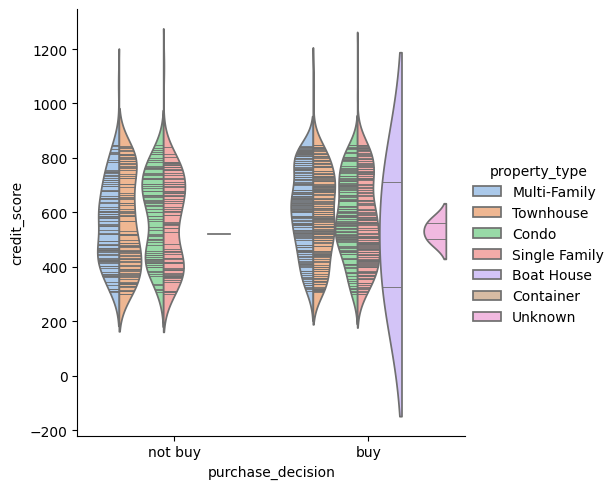

In [13]:
sns.catplot(
    data=df, x="purchase_decision", y="credit_score", hue="property_type",
    kind="violin", inner="stick", split=True, palette="pastel",
)

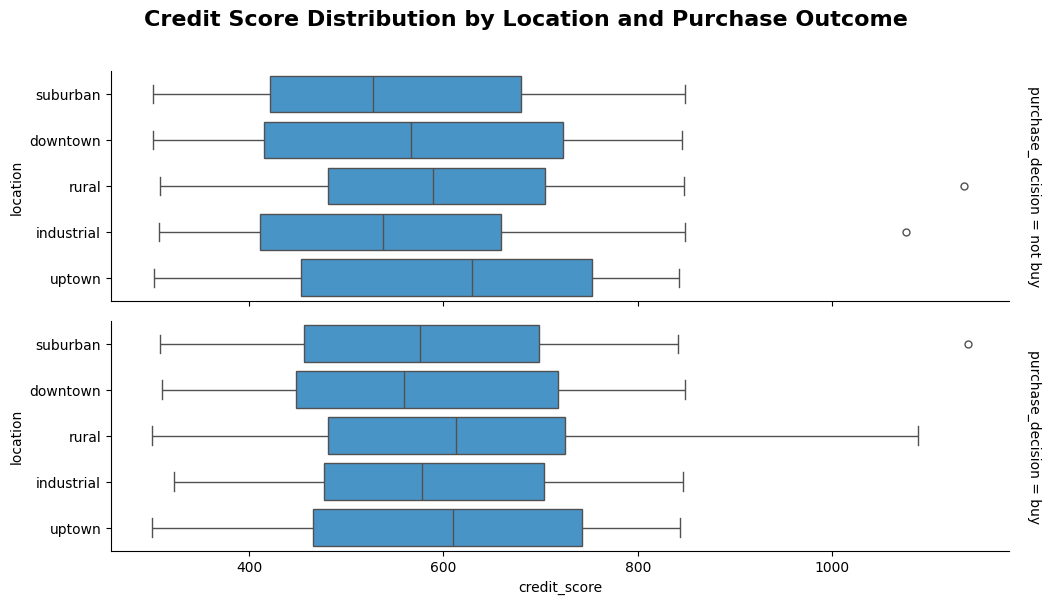

In [14]:
plot_color = "#3498db" # A nice blue color
g = sns.catplot(
    data=df,
    x="credit_score",
    y="location",
    row="purchase_decision",
    kind="box",
    orient="h",
    sharex=True, # Set to True for aligned x-axes (often better for comparison)
    margin_titles=True,
    height=3, # Increase height for better visibility
    aspect=3.5, # Adjust aspect ratio
    color=plot_color, # Apply the new color
    saturation=0.75 # Slightly reduce saturation for a softer look
)
plt.subplots_adjust(top=0.9) # Make room for the main title
g.figure.suptitle('Credit Score Distribution by Location and Purchase Outcome', 
               fontsize=16, 
               fontweight='heavy',
               y=1.0) # Adjust vertical position

# 4. FINAL ADJUSTMENTS
# Remove the warning/tight_layout issue by explicitly calling tight_layout
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to accommodate the suptitle
plt.show() # Always include this to display the plot

<Axes: xlabel='income', ylabel='credit_score'>

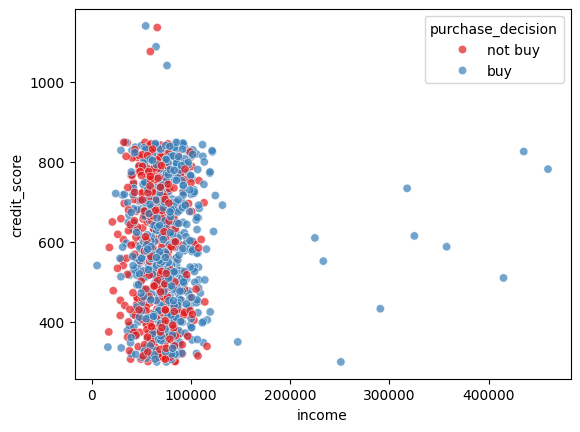

In [15]:
# Correlation Plot
sns.scatterplot(data = df,
                x = 'income',
                y = 'credit_score',
                hue = 'purchase_decision',
                palette = 'Set1',
                alpha = 0.7)

<Axes: xlabel='income', ylabel='credit_score'>

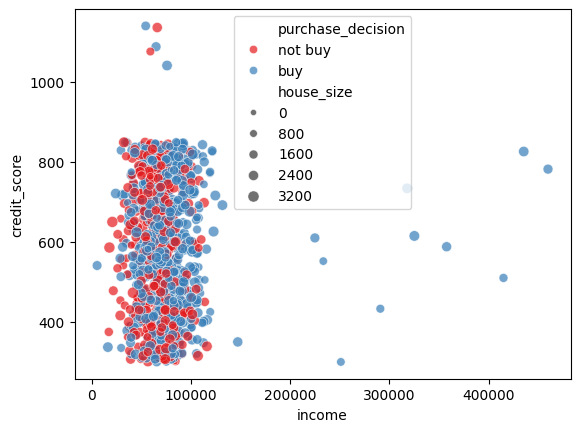

In [16]:
# Correlation Plot
sns.scatterplot(data = df,
                x = 'income',
                y = 'credit_score',
                hue = 'purchase_decision',
                palette = 'Set1',
                size = 'house_size',
                alpha = 0.7)

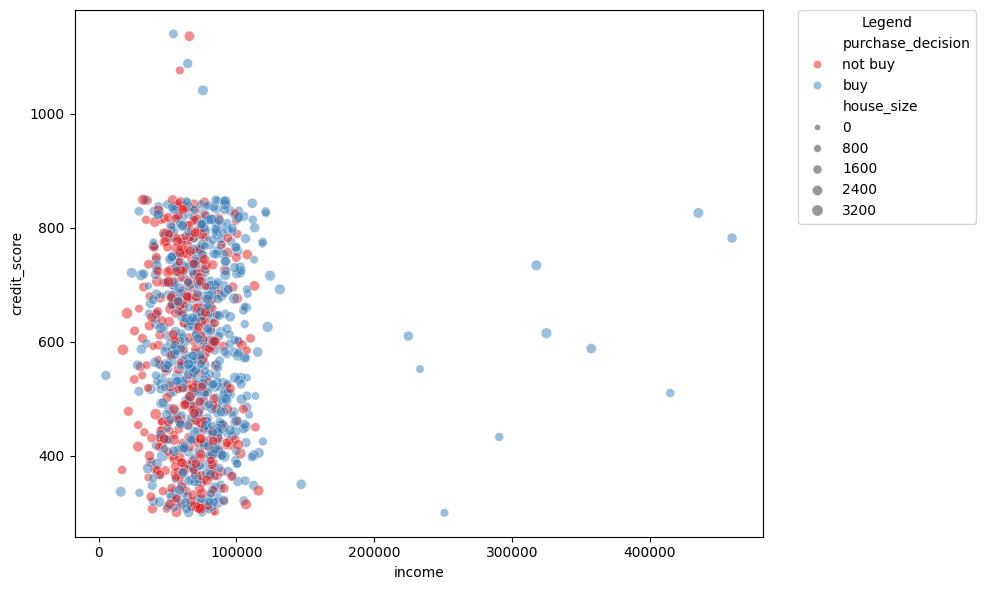

In [17]:
plt.figure(figsize=(10, 6)) # Create a larger figure to accommodate the external legend

ax = sns.scatterplot(
    data=df,
    x='income',
    y='credit_score',
    hue='purchase_decision',
    size='house_size',
    palette=['#e41a1c', '#377eb8'], # Custom palette for better contrast
    alpha=0.5,
    edgecolor='white',
    linewidth=0.5
)

# Move the legend outside the plot
ax.legend(
    title='Legend', # Optionally give the entire legend a title
    bbox_to_anchor=(1.05, 1), # Coordinates (1.05, 1) place the legend's top-left corner
                              # just outside the top-right corner of the plot area.
    loc='upper left',         # Specify which part of the legend box should be anchored (top-left)
    borderaxespad=0.           # Distance between the legend and the axes
)

# Adjust plot layout to prevent the legend from being cut off
plt.tight_layout() 
plt.show()

<h3 style = 'color:green'>2.2.5 Feature Engineering - Imputing, Encoding, and Scaling Data</h3>

In [18]:
si = SimpleImputer(strategy='mean')
# Numerical columns
numericalColumns = df.select_dtypes(include=['float64', 'int64'])

In [19]:
numericalColumns.columns

Index(['income', 'credit_score', 'house_size', 'realtor_rating', 'crime_rate'], dtype='object')

In [20]:
numericalColumns[:5]

,income,credit_score,house_size,realtor_rating,crime_rate
0,79934.283060,426.0,2148,2.674429,36.504238
1,67234.713977,313.0,2144,2.833726,45.847862
2,82953.770762,311.0,1845,3.900024,50.340274
3,100460.597128,386.0,1102,3.297150,51.113726
4,65316.932506,823.0,1274,3.668849,48.209067


In [23]:
df[df['income'] == None]

,income,credit_score,house_size,location,property_type,listing_date,realtor_rating,flood_risk,crime_rate,purchase_decision


In [21]:
# Apply SimpleImputer to numerical columns
df[numericalColumns.columns] = si.fit_transform(numericalColumns)
# Check for missing values again
df.isnull().sum()

income               0
credit_score         0
house_size           0
location             0
property_type        0
listing_date         0
realtor_rating       0
flood_risk           1
crime_rate           0
purchase_decision    0
dtype: int64

In [ ]:
# For categorical columns, we can use the most frequent value (mode)

<Axes: >

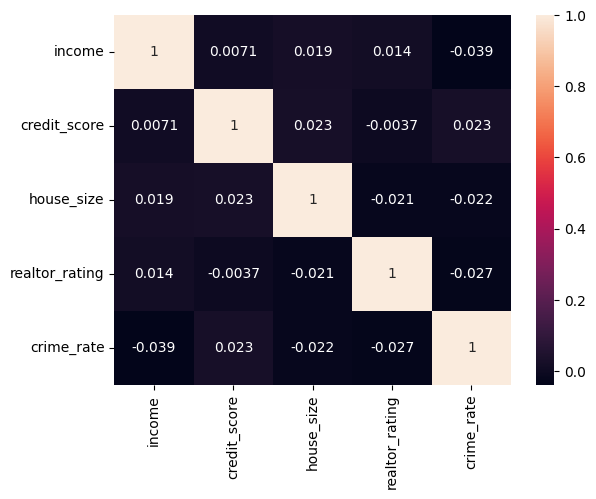

In [24]:
sns.heatmap(df[numericalColumns.columns].corr(), annot=True)

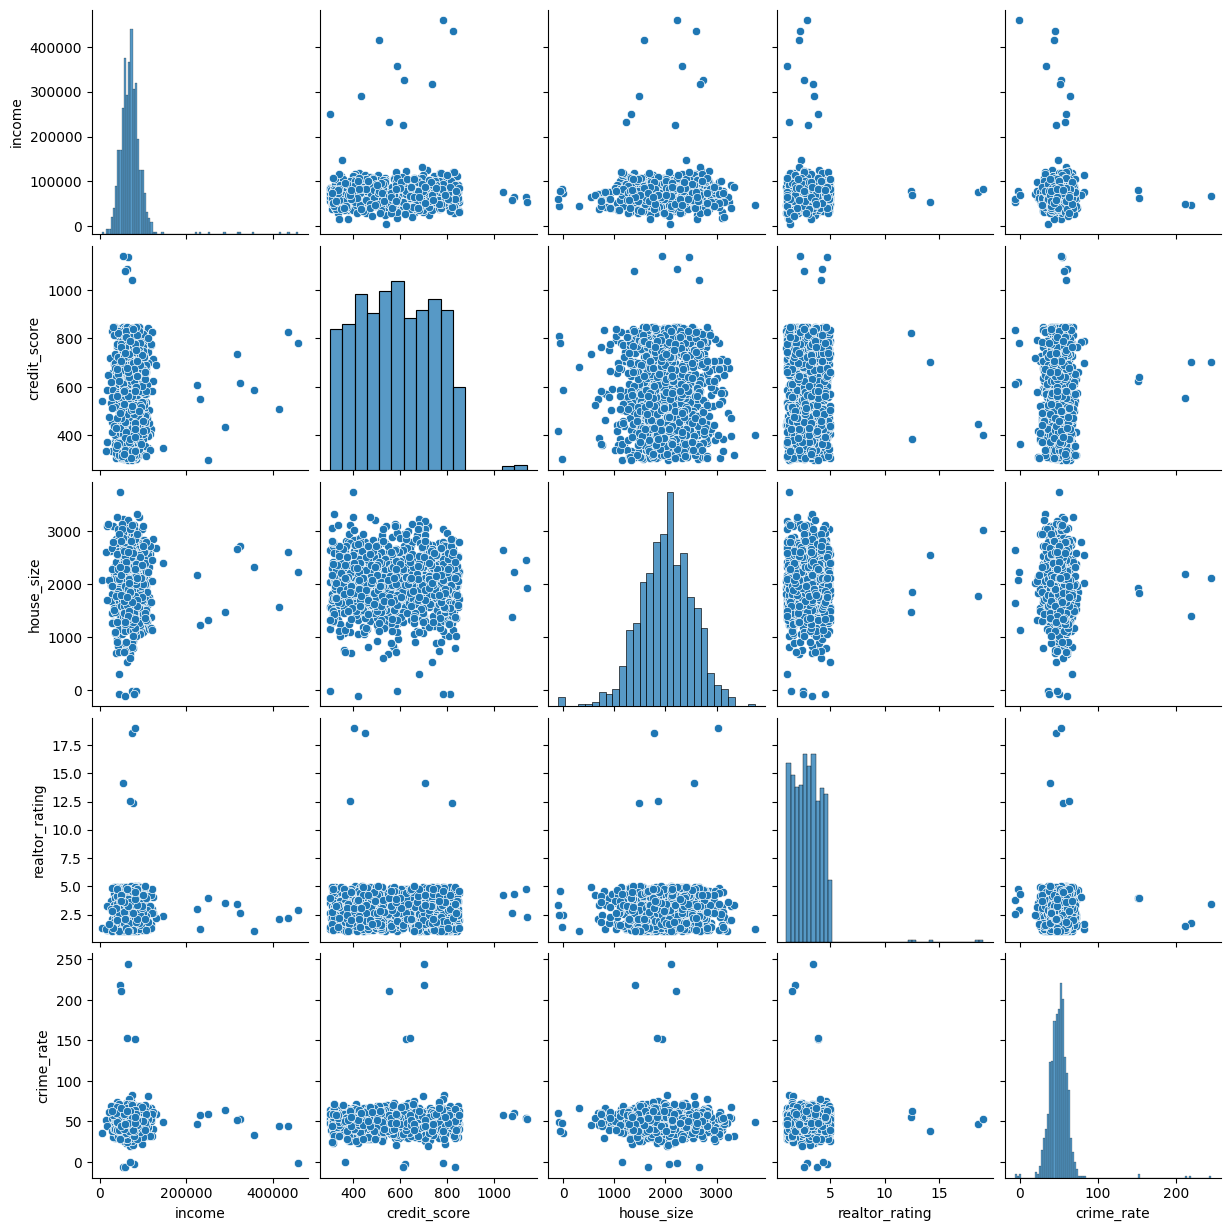

In [25]:
sns.pairplot(df[numericalColumns.columns])

In [26]:
# Pandas Get Dummies for categorical columns
categoricalColumns = df.select_dtypes(include=['object'])
categoricalColumns[:5]

,location,property_type,listing_date,flood_risk,purchase_decision
0,suburban,Multi-Family,18.4.2023,Low,not buy
1,suburban,Townhouse,2019-03-14,High,buy
2,downtown,Townhouse,7/26/2019,High,not buy
3,rural,Multi-Family,12/28/2020,Medium,buy
4,rural,Multi-Family,10.1.2019,High,buy


In [27]:
df.drop('listing_date', axis = 1, inplace=True)

In [29]:
df['location'].value_counts()

location
uptown        207
rural         201
suburban      199
industrial    198
downtown      195
Name: count, dtype: int64

In [32]:
df['property_type'].value_counts()

property_type
Townhouse        273
Multi-Family     255
Single Family    237
Condo            230
Boat House         2
Unknown            2
Container          1
Name: count, dtype: int64

In [31]:
df.head(1)

,income,credit_score,house_size,location,property_type,realtor_rating,flood_risk,crime_rate,purchase_decision
0,79934.28306,426.0,2148.0,suburban,Multi-Family,2.674429,Low,36.504238,not buy


In [30]:
categoricalColumns = df.select_dtypes(include=['object'])
df_categorical = pd.get_dummies(categoricalColumns, drop_first=True, prefix='loc_', dtype=int) # Ensure that data type = 0 and 1 instead of True and False

df_categorical.head()

,loc__industrial,loc__rural,loc__suburban,loc__uptown,loc__Condo,loc__Container,loc__Multi-Family,loc__Single Family,loc__Townhouse,loc__Unknown,loc__High,loc__Low,loc__Medium,loc__UnknownRisk,loc__not buy
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [33]:
# Create training and testing sets
X = pd.concat([df[numericalColumns.columns], df_categorical], axis=1)
# X.drop('buy', axis = 1, inplace=True)
X.head()

,income,credit_score,house_size,realtor_rating,crime_rate,loc__industrial,loc__rural,loc__suburban,loc__uptown,loc__Condo,loc__Container,loc__Multi-Family,loc__Single Family,loc__Townhouse,loc__Unknown,loc__High,loc__Low,loc__Medium,loc__UnknownRisk,loc__not buy
0,79934.283060,426.0,2148.0,2.674429,36.504238,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1,67234.713977,313.0,2144.0,2.833726,45.847862,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,82953.770762,311.0,1845.0,3.900024,50.340274,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,100460.597128,386.0,1102.0,3.297150,51.113726,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,65316.932506,823.0,1274.0,3.668849,48.209067,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [34]:
y = df['purchase_decision']

In [35]:
# X = predictor variables (everything else)
# y = target variable (buy or not buy)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
Xtrain.shape

(800, 20)

In [37]:
ytrain.shape

(800,)

In [38]:
Xtrain[:5]

,income,credit_score,house_size,realtor_rating,crime_rate,loc__industrial,loc__rural,loc__suburban,loc__uptown,loc__Condo,loc__Container,loc__Multi-Family,loc__Single Family,loc__Townhouse,loc__Unknown,loc__High,loc__Low,loc__Medium,loc__UnknownRisk,loc__not buy
29,64166.125004,681.0,2209.0,3.270909,53.700611,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
535,70947.973426,516.0,1889.0,2.034366,53.116529,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
695,63809.071214,804.0,2478.0,2.418914,57.034279,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
557,61348.836244,587.0,2001.0,2.173414,57.938185,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
836,101010.009856,461.0,1450.0,1.507778,30.632473,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [39]:
# MinMaxScaler for feature scaling
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtrain_scaled[:1]

array([[0.12972105, 0.45357143, 0.59989594, 0.12593013, 0.24044577,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [40]:
ss = StandardScaler()
Xtrain_scaled_ss = ss.fit_transform(Xtrain)
Xtrain_scaled_ss[:1]

array([[-0.26909792,  0.6348904 ,  0.36959146,  0.20563142,  0.25007464,
        -0.50974751, -0.49609064, -0.50390326,  2.        , -0.54267705,
        -0.03537746, -0.58697344,  1.78563201, -0.61009236, -0.05006262,
        -0.73985727, -0.69982706,  1.47465358, -0.03537746, -0.77047096]])

<b>Expectation for homework:</b>
- Visualize and explore the data to ensure data range is suitable (if needed research the data domain). Remember data science combines domain knowledge, statistical analysis, and machine learning to find patterns and insights.
- Perform univariate and bivariate analysis to understand the data and identify relationships. Not all relationships are important, but they can help in feature engineering and selection.
- Handle missing values using appropriate methods (e.g., mean, median, mode). We will learn about advanced techniques later on.
- Encode categorical variables using one-hot encoding or ordinal encoding.
- Perform feature scaling (e.g., standardization, normalization) to ensure all features are on the same scale.
- Compare and contrast the original data with the preprocessed data to understand the impact of preprocessing techniques. Prepare a nice report summarizing your findings.

Your homework submission should be insightful and well-documented. Do not include random stuff.



In [ ]:
# df.to_csv("...//csv", index=False)